In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c dogs-vs-cats

In [ ]:
 !ls

In [ ]:
from zipfile import ZipFile
dataset="/content/dogs-vs-cats.zip"
with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("the dataset is extracted")

In [ ]:
from zipfile import ZipFile
dataset="/content/train.zip"
with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("the dataset is extracted")

In [ ]:
import os
path,dirs,files=next(os.walk('/content/train'))
file_count=len(files)
print("number of images:",file_count)


In [ ]:
file_names=os.listdir("/content/train")
print(file_names)

In [ ]:
from zipfile import ZipFile
dataset="/content/test1.zip"
with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("the dataset is extracted")

In [ ]:
import os
path,dirs,files=next(os.walk('/content/test1'))
file_count=len(files)
print("number of images:",file_count)

In [ ]:
file_names=os.listdir("/content/test1")
print(file_names)

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image 
from sklearn.model_selection import train_test_split

In [ ]:
img=mpimg.imread("/content/train/cat.10001.jpg") 
imgplt=plt.imshow(img)
plt.show

In [ ]:
file_names=os.listdir("/content/train")
for i in range(5):
  name=file_names[i]
  print(name[0:17])

In [ ]:
file_names=os.listdir("/content/train")
cat_count=0
dog_count=0

for img_file in file_names:
  name=img_file[0:3]

  if name=="cat":
     cat_count+=1

  if name=="dog":
     dog_count+=1


print("number of cat images:",cat_count)
print("number of dog images:",dog_count)


Resizing all the images

In [ ]:
os.mkdir("/content/image resized2")

/content/train_new/Image_18.jpg 

In [ ]:
original_folder="/content/train"
resized_folder="/content/image resized2"

for i in range(2000):
  filename=os.listdir(original_folder)[i]
  img_path=original_folder+"/"+filename

  img=Image.open(img_path)
  img=img.resize((224,224))
  img=img.convert("RGB")

  newimgpath=resized_folder+"/"+filename
  img.save(newimgpath)


In [ ]:
img=mpimg.imread("/content/image resized2/cat.1004.jpg")
imgplt=plt.imshow(img)
plt.show()

Creating labels for resized images of dogs and cats

Cat>1

Dog-->0

In [ ]:
filenames=os.listdir("/content/image resized2")

labels=[]

for i in range(2000):
    img_names=file_names[i]
    name=img_names[0:3]


    if name[0:3]=="cat" :
      labels.append(1)

    if name[0:3]=="dog":
      labels.append(0)


  
  

  

In [ ]:
print(labels)

In [ ]:
print(len(labels))

In [ ]:
print(len(filenames))

In [ ]:
print(filenames[0:5])


In [ ]:
print(labels[0:5])

In [ ]:
values,counts=np.unique(labels,return_counts=True)
print(values)
print(counts)

Converting all the resized images to numpy arrays

In [ ]:
import cv2
import glob
import keras

In [ ]:
image_directory="/content/image resized2/"
image_extension=["JPG","jpg"]

files=[]

[files.extend(glob.glob(image_directory+ "*." +i)) for i in image_extension]

cat_dogs_images = np.asarray([cv2.imread(file) for file in files])


In [ ]:
print(cat_dogs_images)

In [ ]:
print(len(cat_dogs_images))

In [ ]:
type(cat_dogs_images)

In [ ]:
print(cat_dogs_images.shape)

In [ ]:
X=cat_dogs_images
Y=np.asarray(labels)

In [ ]:
print(Y)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X.shape,X_train.shape,X_test.shape)

In [ ]:
print(Y_train.shape,Y_test.shape)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [ ]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
print(X_test)

In [ ]:
print(X_test_scaled)

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow import keras

In [ ]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [ ]:
num_of_classes = 2

model = tf.keras.Sequential([
    
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

In [ ]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['acc'])

In [ ]:
model.fit(X_train_scaled, Y_train,epochs=5)

In [ ]:
loss,acc=model.evaluate(X_test_scaled,Y_test)
print("Test Loss=",loss)
print("Test Accuracy=",acc)

Path of the image to be predicted: /content/image resized2/dog.10494.jpg


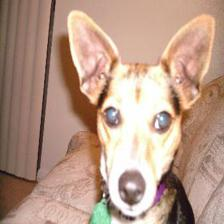

1/1 [==============================] - 0s 57ms/step
[[ 0.84984976 -2.4625318 ]]
0
The image represents a dog


In [91]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The image represents a cat')

else:
  print('The image represents a dog')